# cs7324 Lab 1 - Exploring Table Data

#### Chip Henderson - 48996654 

## 1. Business Understanding

The chemical composition of wine can go a long way to understanding why certain traits and characteristics are present in one bottle and not in another. It is critical for a winemaker to understand how the chemical composition of their products produce desirbable results such as quality. If a winemaker could maximize or minimize certain chemical components through processing of the grapes, types of aging barrels, temperature of the wine cellar, etc., they could maximize their profits by only producing only wine of the highest possible quality. 

The 'Wine Quality' dataset from the University of California Irvine's (UCI) repository contains chemical composition data on the Vinho-Verde varietal in both red and white colors. The dataset has greater than 1,000 instances and comes in separate parts for 'red' and 'white' vinho-verde.

This particular varietal is native to northern Portugal. Per the Wine Folly website, "Vinho Verde comes from a small region in Northern Portugal known for its super-value whites, reds, and rosés. These wines are loved for mouth-zapping acidity, subtle carbonation, and lower alcohol – making them a great choice for summer (Puckette - https://winefolly.com/deep-dive/vinho-verde-the-perfect-poolside-wine-from-portugal/)." 

White Vinho Verde is far more common than red and the sample size of each varietal reflect that. Also, what makes a great red vinho-verde could be far different than what makes a great white vinho-verde. This will need to be considered in the analysis. The exploration of this dataset will examine whether we can approach winemaking from the perspective of a chemist to tweak our way to the best quality.

A brief overview of the features in this dataset that we'll be exploring to determine what makes a great Vinho-Verde:
 - Quality - Easily the most important aspect we're trying to maximize based on other values, but a qualitative measurement
 - Alcohol - Conceptually important but also subjective because some may prefer stronger wines
 - Fixed Acidity - AKA titratable acidity. "The most common titratable acids are tartaric, malic, citric, carbonic acid. These acids, along with many more in smaller quantities, either occur naturally in the grapes or are created through the fermentation process (http://winemakersacademy.com/understanding-wine-acidity/)." 
 - Volatile Acidity - "Volatile acids are produced through microbial action such as yeast fermentation, malolactic fermentation, and other fermentations carried out by spoilage organisms. The most prominent volatile acid present in wine is acetic acid. Also of importance is lactic acid. Aside from lactic acid the presence of volatile acids in any appreciable quantity is a sign of spoilage. Acetic acid is produced by acetobacter as it ferments your nice fine wine into vinegar. Our palates are quite sensitive to the presence of volatile acids and for that reason we try to keep their concentrations as low as possible (http://winemakersacademy.com/understanding-wine-acidity/)." 
 - Citric Acid - "Citric acid plays a major role in a winemakers influence on acidity. Many winemakers use citric acid to acidify wines that are too basic and as a flavor additive. This process has is benefits and drawbacks. Adding citric acid will give the wine “freshness” otherwise not present and will effectively make a wine more acidic (https://www.calwineries.com/learn/wine-chemistry/wine-acids/citric-acid)."
 - Residual Sugar - "Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter (https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/)."
 - Chlorides - The level of Chloride and sodium ions in wines essentially depends on the geographic, geologic and climatic conditions of vine culture. As a general rule, the levels of these ions are low. The content of these elements is increased in wines coming from vineyards which are near the sea coast, which have brackish sub—soil or which have arid ground irrigated with salt water and the molar ratio cf Cl/Na+ therefore varies significantly and can even have a value close to one (1) which could imply the addition of salt (NaCl) to the wine. (https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines)."
 - Free Sulfur Dioxide
 - Total Sulfur Dioxide - "In winemaking, the use of sulfur dioxide (SO2) is critical. We tend to talk a lot about free SO2 (FSO2) in particular, and not without good reason. The FSO2 and the pH of your wine determine how much SO2 is available in the active, molecular form to help protect the wine from oxidation and spoilage (Moroney - https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)."
 - Density
 - pH - "The pH of a wine is critical not only to its flavor but to nearly every aspect of the wine. According to wine maker Alison Crowe of Winemaker Magazine “pH is the backbone of a wine”. It is second in importance only to the must sugar levels. Fluctuations in pH could mean the difference between a wine going down the sink and one you hang a double gold medal on (http://winemakersacademy.com/importance-ph-wine-making/)."
 - Sulphates - "Sulfites and sulfur dioxide are widely used as food preservatives to prevent the discoloration and oxidation of foods such as dried fruit, wine, baked goods, and condiments, to name a few. In wine making, sulfur dioxide occurs naturally in the fermentation process. Additional sulfites are added to prevent wines from oxidizing and turning brown (https://www.royalgrapeseed.com/single-post/2019/01/09/sulfites-and-sulfur-dioxide-what-are-they-and-why-to-avoid-them#:~:text=Sulfites%20and%20sulfur%20dioxide%20are%20widely%20used%20as,to%20prevent%20wines%20from%20oxidizing%20and%20turning%20brown)."

======================================================================================

Dataset: Wine Quality (10/6/2009) https://archive.ics.uci.edu/dataset/186/wine+quality

Overarching Question: What chemical comonents produce the highest quality red and white Vinho Verde wines?

## 2. Data Understanding

In [1]:
# Pulled two datasets into dataframe in Pandas
import pandas as pd
import numpy as np

white_df = pd.read_csv('winequality-white.csv', sep=';')
red_df = pd.read_csv('winequality-red.csv', sep=';')

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)
white_df.head()

Pandas: 2.0.3
Numpy: 1.24.3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It was important to make sure I added categorical data to each dataset which I used wine color to do. Because I only want to work with one dataset and I've verified column values are the same across the two, I combined the datasets.

In [3]:
# Add category of color to both datasets
white_df.insert(0, 'color', 'white')
red_df.insert(0, 'color', 'red')

# Merge the two datasets
df_wine_merged = pd.concat([red_df, white_df], ignore_index=True)
print(df_wine_merged)

      color  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
6492  white            6.2              0.21         0.29             1.6   
6493  white            6.6              0.32         0.36             8.0   
6494  white            6.5              0.24         0.19             1.2   
6495  white            5.5              0.29         0.30             1.1   
6496  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

Let's get some general info about our dataset:

In [4]:
# Display general statistics about the dataset - Referencing code from lecture and in-class examples
df_wine_merged.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Here I can see that my features all have the same number of items which is important. We'll look at that visually later. Also, it looks like the quality ratings in this dataset range from 3 to 9.

Lets check out the datatypes we're working with:

In [5]:
# Display information about datatypes in the dataset - Referencing code from lecture and in-class examples
print(df_wine_merged.dtypes)
print("===============")
print(df_wine_merged.info())

color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7  

From the data above I can see I have largely numeric data with one categorical data type. 

#### Question: What correlation of characteristics contribute to a great wine quality?

In [6]:
# Let's pull some basic correlation data
# Check correlation of each value to quality excluding color and quality
features_to_ignore = ['color', 'quality']
features_to_correlate = [feature for feature in df_wine_merged.columns if feature not in features_to_ignore]

corr_to_quality = [df_wine_merged[feature].corr(df_wine_merged['quality']) for feature in features_to_correlate] 

for feature, value in zip(features_to_correlate, corr_to_quality):
    print(f'The correlation of ', feature, ' to quality is ', round(value,3))

The correlation of  fixed acidity  to quality is  -0.077
The correlation of  volatile acidity  to quality is  -0.266
The correlation of  citric acid  to quality is  0.086
The correlation of  residual sugar  to quality is  -0.037
The correlation of  chlorides  to quality is  -0.201
The correlation of  free sulfur dioxide  to quality is  0.055
The correlation of  total sulfur dioxide  to quality is  -0.041
The correlation of  density  to quality is  -0.306
The correlation of  pH  to quality is  0.02
The correlation of  sulphates  to quality is  0.038
The correlation of  alcohol  to quality is  0.444


We'll look at correlation more under visualization, however at a glance I can see a winemaker would like to:
 -  Minimize the following for a higher quality wine:
     -  Volatile acidity 
     -  Chlorides
     -  Density 
  -  And, Keep alcohol content on the higher side for higher quality
  
The rest of these correlation values appear rather insignificant (<.1).

# 3. Data Visualization

Let's visually make sure there are the same nmber of instances for each feature:

<Axes: >

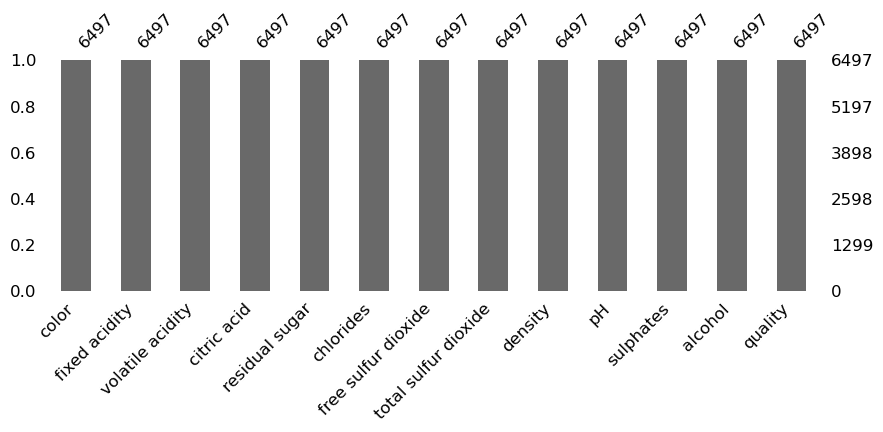

In [7]:
# Referencing code from lecture and in-class examples
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn
# As a departure from lecture code I'm using a bar chart, 
# Matrix version gave me errors regarding 'grid_b' which I wasn't able to resolve
mn.bar(df_wine_merged, figsize=(10,3), fontsize=12) 

Each feature has 6,497 instances which tells me my data looks complete for each value.

Let's try grouping the wines by their quality and color values.

In [8]:
# Group by quality and print average values
df_quality_group = df_wine_merged.groupby(by=['quality','color']).mean()
df_quality_group.head(13)

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

One thing that stands out right away is that there are no red wines listed in the highest quality grouping.

#### Question: What if any data should we discard in the analysis?

Let's check out the sample size of each grouping. This would be helpful to understand how much statistical significance there is across the groups.

[Text(0, 0, '30'),
 Text(0, 0, '216'),
 Text(0, 0, '2138'),
 Text(0, 0, '2836'),
 Text(0, 0, '1079'),
 Text(0, 0, '193'),
 Text(0, 0, '5')]

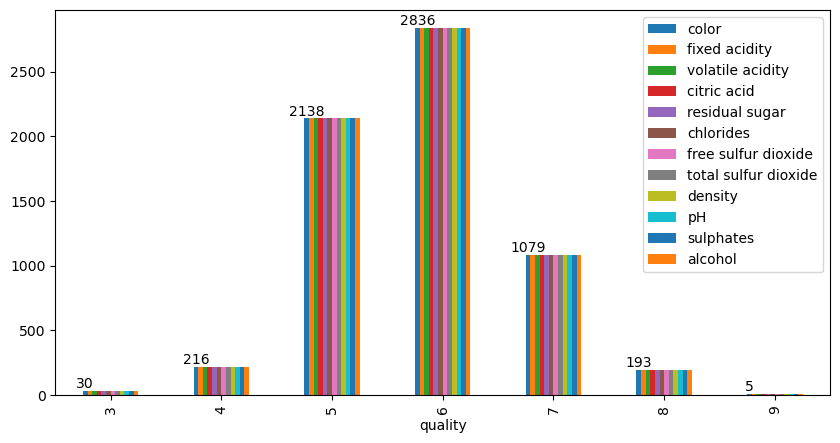

In [9]:
df_quality_group = df_wine_merged.groupby('quality').count()
ax = df_quality_group.plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])

# plt.show()

There are only 30 samples in the lowest quality range, and only 5 in the highest quality range. Also there are no red wines in the highest quality group. That tells me I shouldn't put too much emphasis on results in these categories alone. At a minimum we should consider categorizing Low, Med, High ranges for quality.

Let's go ahead and add those labels and take another look.

[Text(0, 0, '2384'), Text(0, 0, '2836'), Text(0, 0, '1277')]

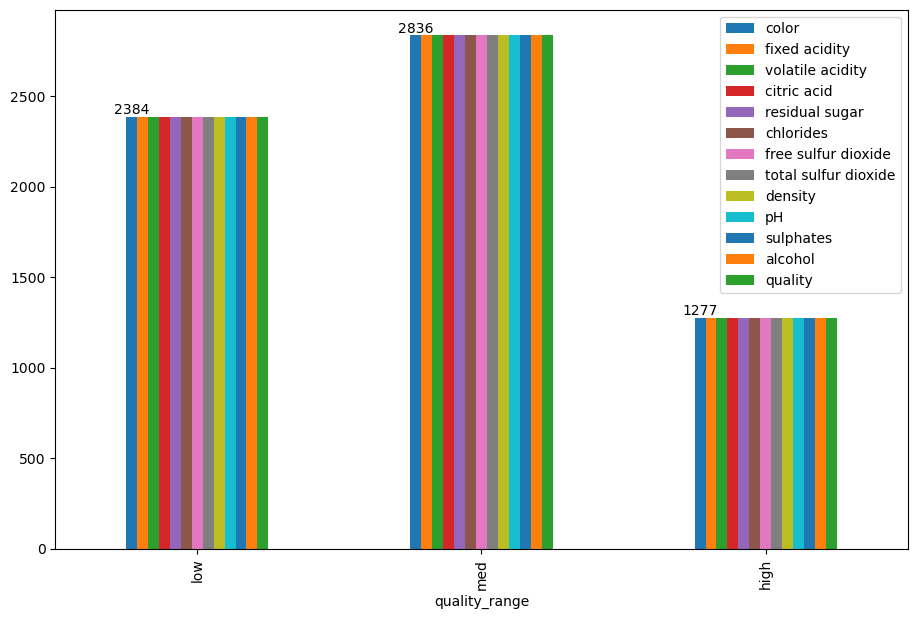

In [10]:
# Adding some labels to categorize quality
# Code from in class lecture altered to better represent my dataframe
df_wine_merged['quality_range'] = pd.cut(df_wine_merged['quality'],
                                 [0,5,6,10], # Group from 0 to 5, 5 to 6, and 6 to 10
                                 labels=['low','med','high'])

# df_wine_merged.head(100)
df_quality_group_quality_range = df_wine_merged.groupby('quality_range').count()
ax = df_quality_group_quality_range.plot.bar(figsize=(11,7))
ax.bar_label(ax.containers[0])

These bins will make each of our quality categories a little closer to equal.

To assess data to remove, lets look at some box plots of our data to get a feel for data distribution.

Seaborn: 0.12.2


Text(0.5, 1.0, 'Alcohol')

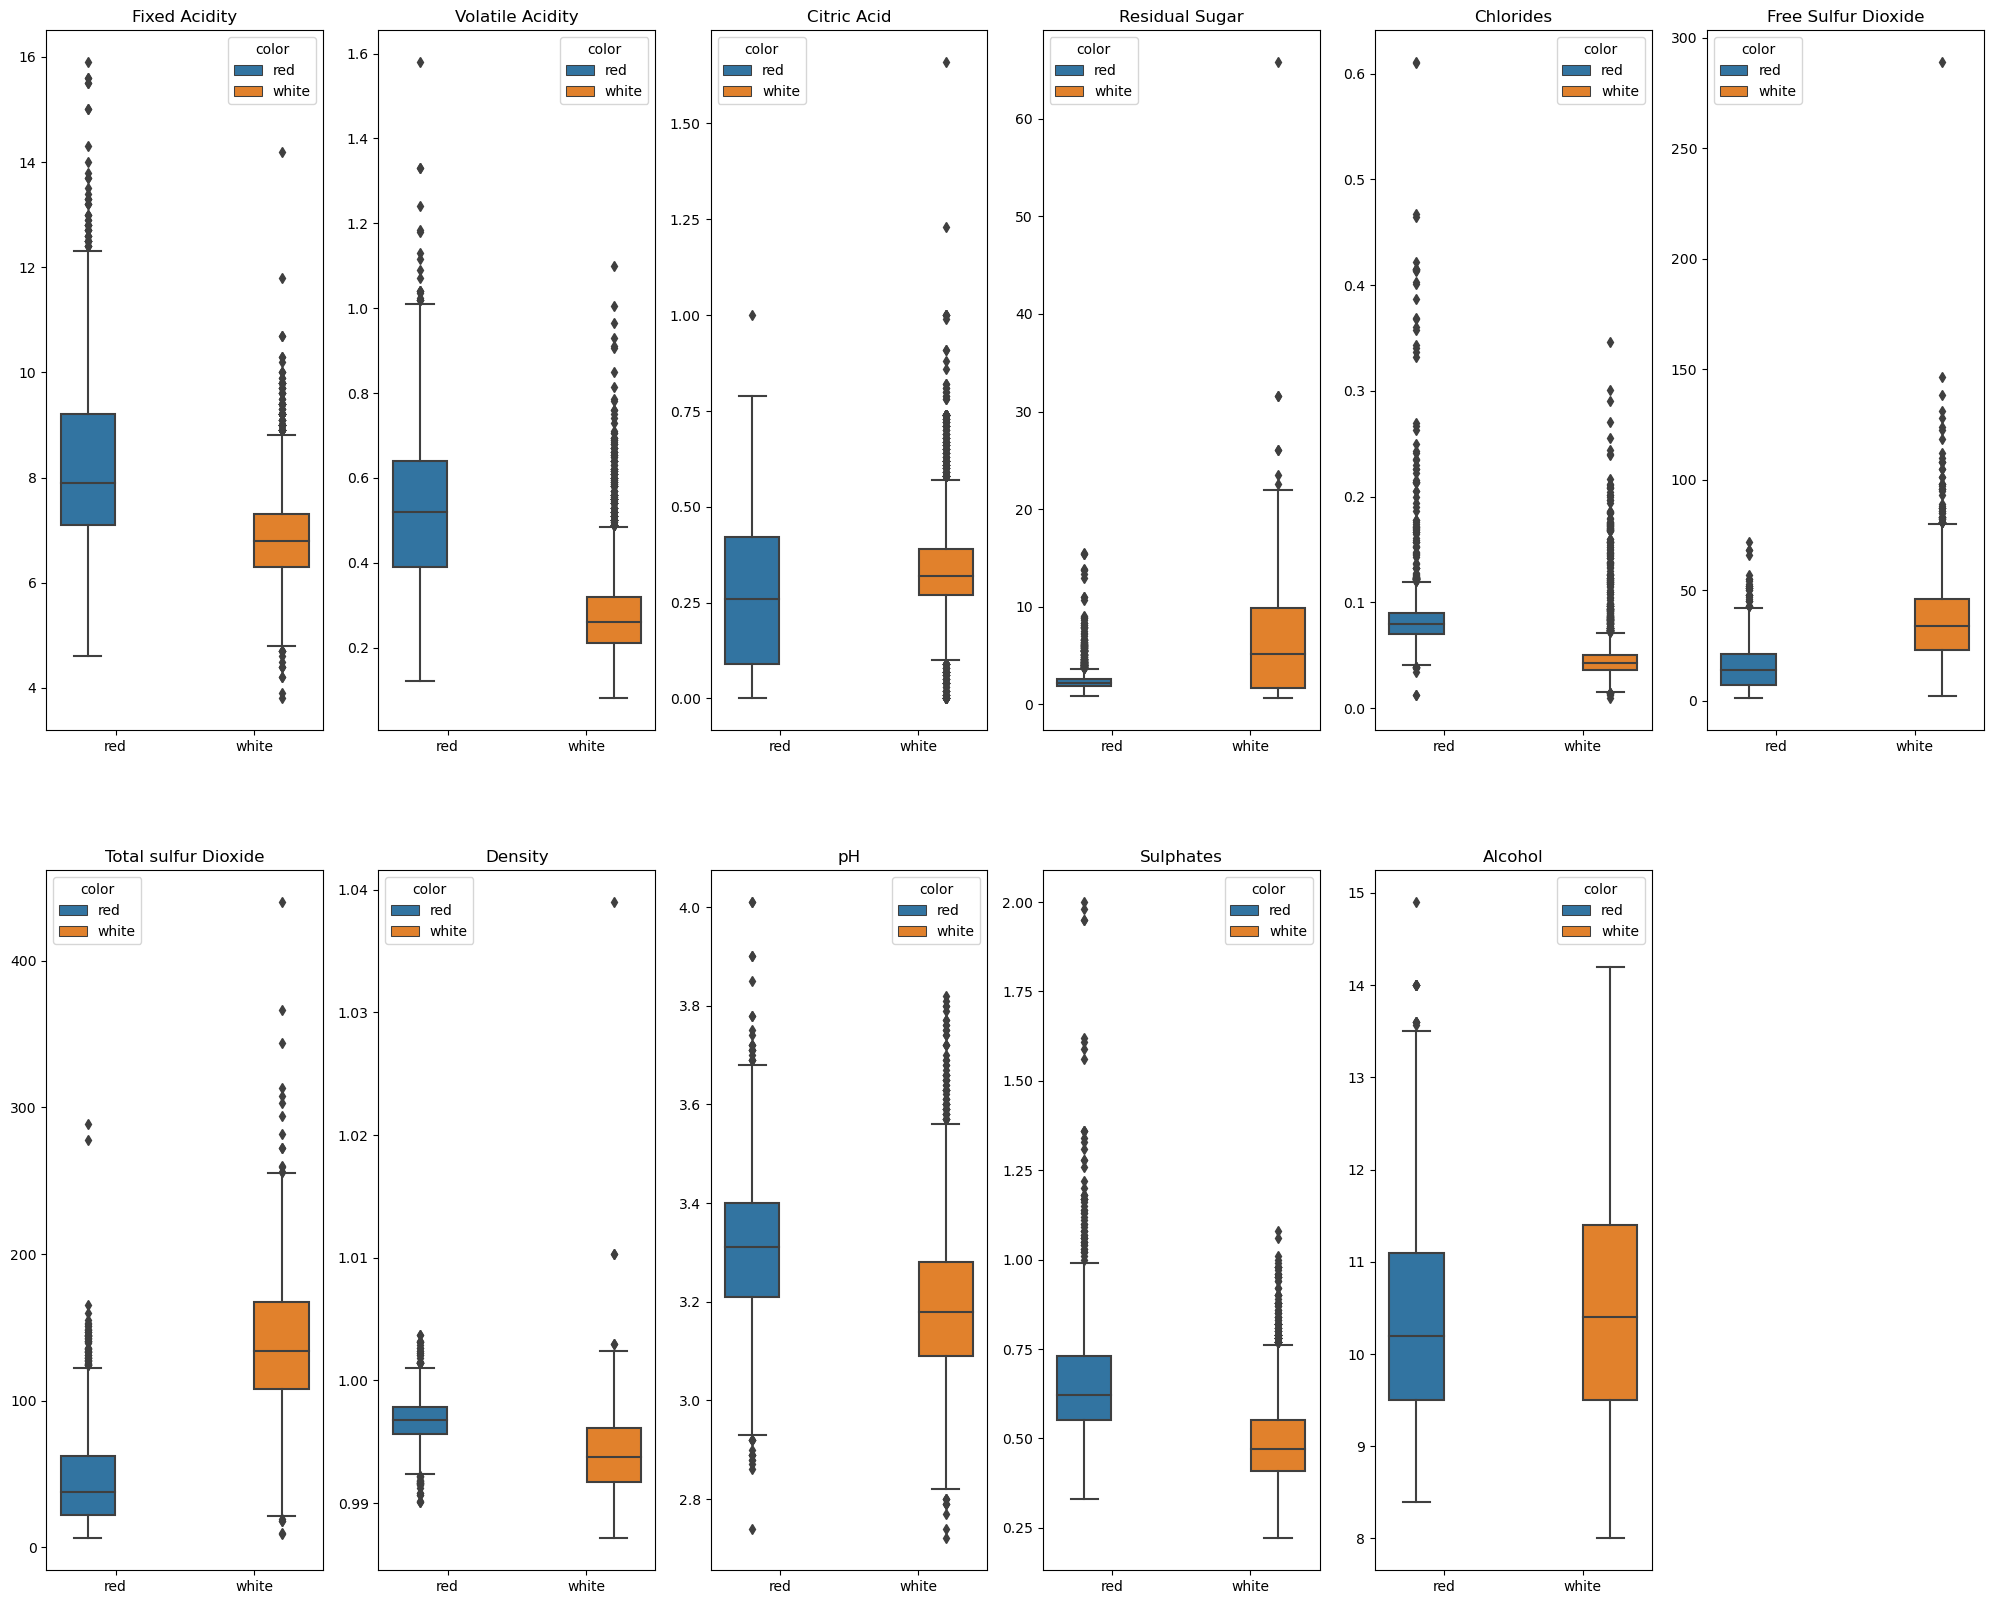

In [11]:
# Code from course lecture
import seaborn as sns
print('Seaborn:', sns.__version__)

plt.subplots(figsize=(25, 20))

# Modified from course lecture to remove axis labels
# source (https://www.tutorialspoint.com/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot)
plt.subplot(2,6,1)
ax = sns.boxplot(x="color",y="fixed acidity", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Fixed Acidity')

plt.subplot(2,6,2)
ax = sns.boxplot(x="color",y="volatile acidity", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Volatile Acidity')

plt.subplot(2,6,3)
ax = sns.boxplot(x="color",y="citric acid", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Citric Acid')

plt.subplot(2,6,4)
ax = sns.boxplot(x="color",y="residual sugar", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Residual Sugar')

plt.subplot(2,6,5)
ax = sns.boxplot(x="color",y="chlorides", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Chlorides')

plt.subplot(2,6,6)
ax = sns.boxplot(x="color",y="free sulfur dioxide", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Free Sulfur Dioxide')

plt.subplot(2,6,7)
ax = sns.boxplot(x="color",y="total sulfur dioxide", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Total sulfur Dioxide')

plt.subplot(2,6,8)
ax = sns.boxplot(x="color",y="density", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Density')

plt.subplot(2,6,9)
ax = sns.boxplot(x="color",y="pH", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('pH')

plt.subplot(2,6,10)
ax = sns.boxplot(x="color",y="sulphates", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Sulphates')

plt.subplot(2,6,11)
ax = sns.boxplot(x="color",y="alcohol", hue='color', data=df_wine_merged)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Alcohol')

One thing that stands out is that almost every feature has several outlier values, most on the high side, skewing the data.

To identifier outliers, I'll use the formula:
 -  Anything above Q3 + 1.5 x IQR
 -  Anything below Q1 - 1.5 x IQR
 
Source https://articles.outlier.org/calculate-outlier-formula

In [12]:
# Source: https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# Source: https://thispointer.com/pandas-count-values-in-column-greater-than-n/

# Start by creating a new df which matches df_wine_merged
df_wine_altered = df_wine_merged
features_to_ignore.append('quality_range') # We added a new string feature so we need to ignore it for this calculation

for feature in df_wine_merged.columns:

    indices_to_remove = []
    high_indices_to_remove = []
    low_indices_to_remove = []
    
    if feature not in features_to_ignore:
                
        q1 = df_wine_merged[feature].quantile(0.25)
        q3 = df_wine_merged[feature].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr # Calculate interquartile range max and min values
        lower_limit = q1 - 1.5 * iqr
        column = df_wine_merged[feature]
        
        # Collect indexes of values outside our outlier limits
        high_indices_to_remove = df_wine_altered.index[column > upper_limit].tolist()
        low_indices_to_remove = df_wine_altered.index[column < lower_limit].tolist()

        # Drop outlier values
        df_wine_altered.drop(index=high_indices_to_remove, inplace=True)
        df_wine_altered.drop(index=low_indices_to_remove, inplace=True)
        

#### Question: Can we visually identify trends across the quality groups?

Now that we've dropped our outliers, let's re-run our box plots by quality range

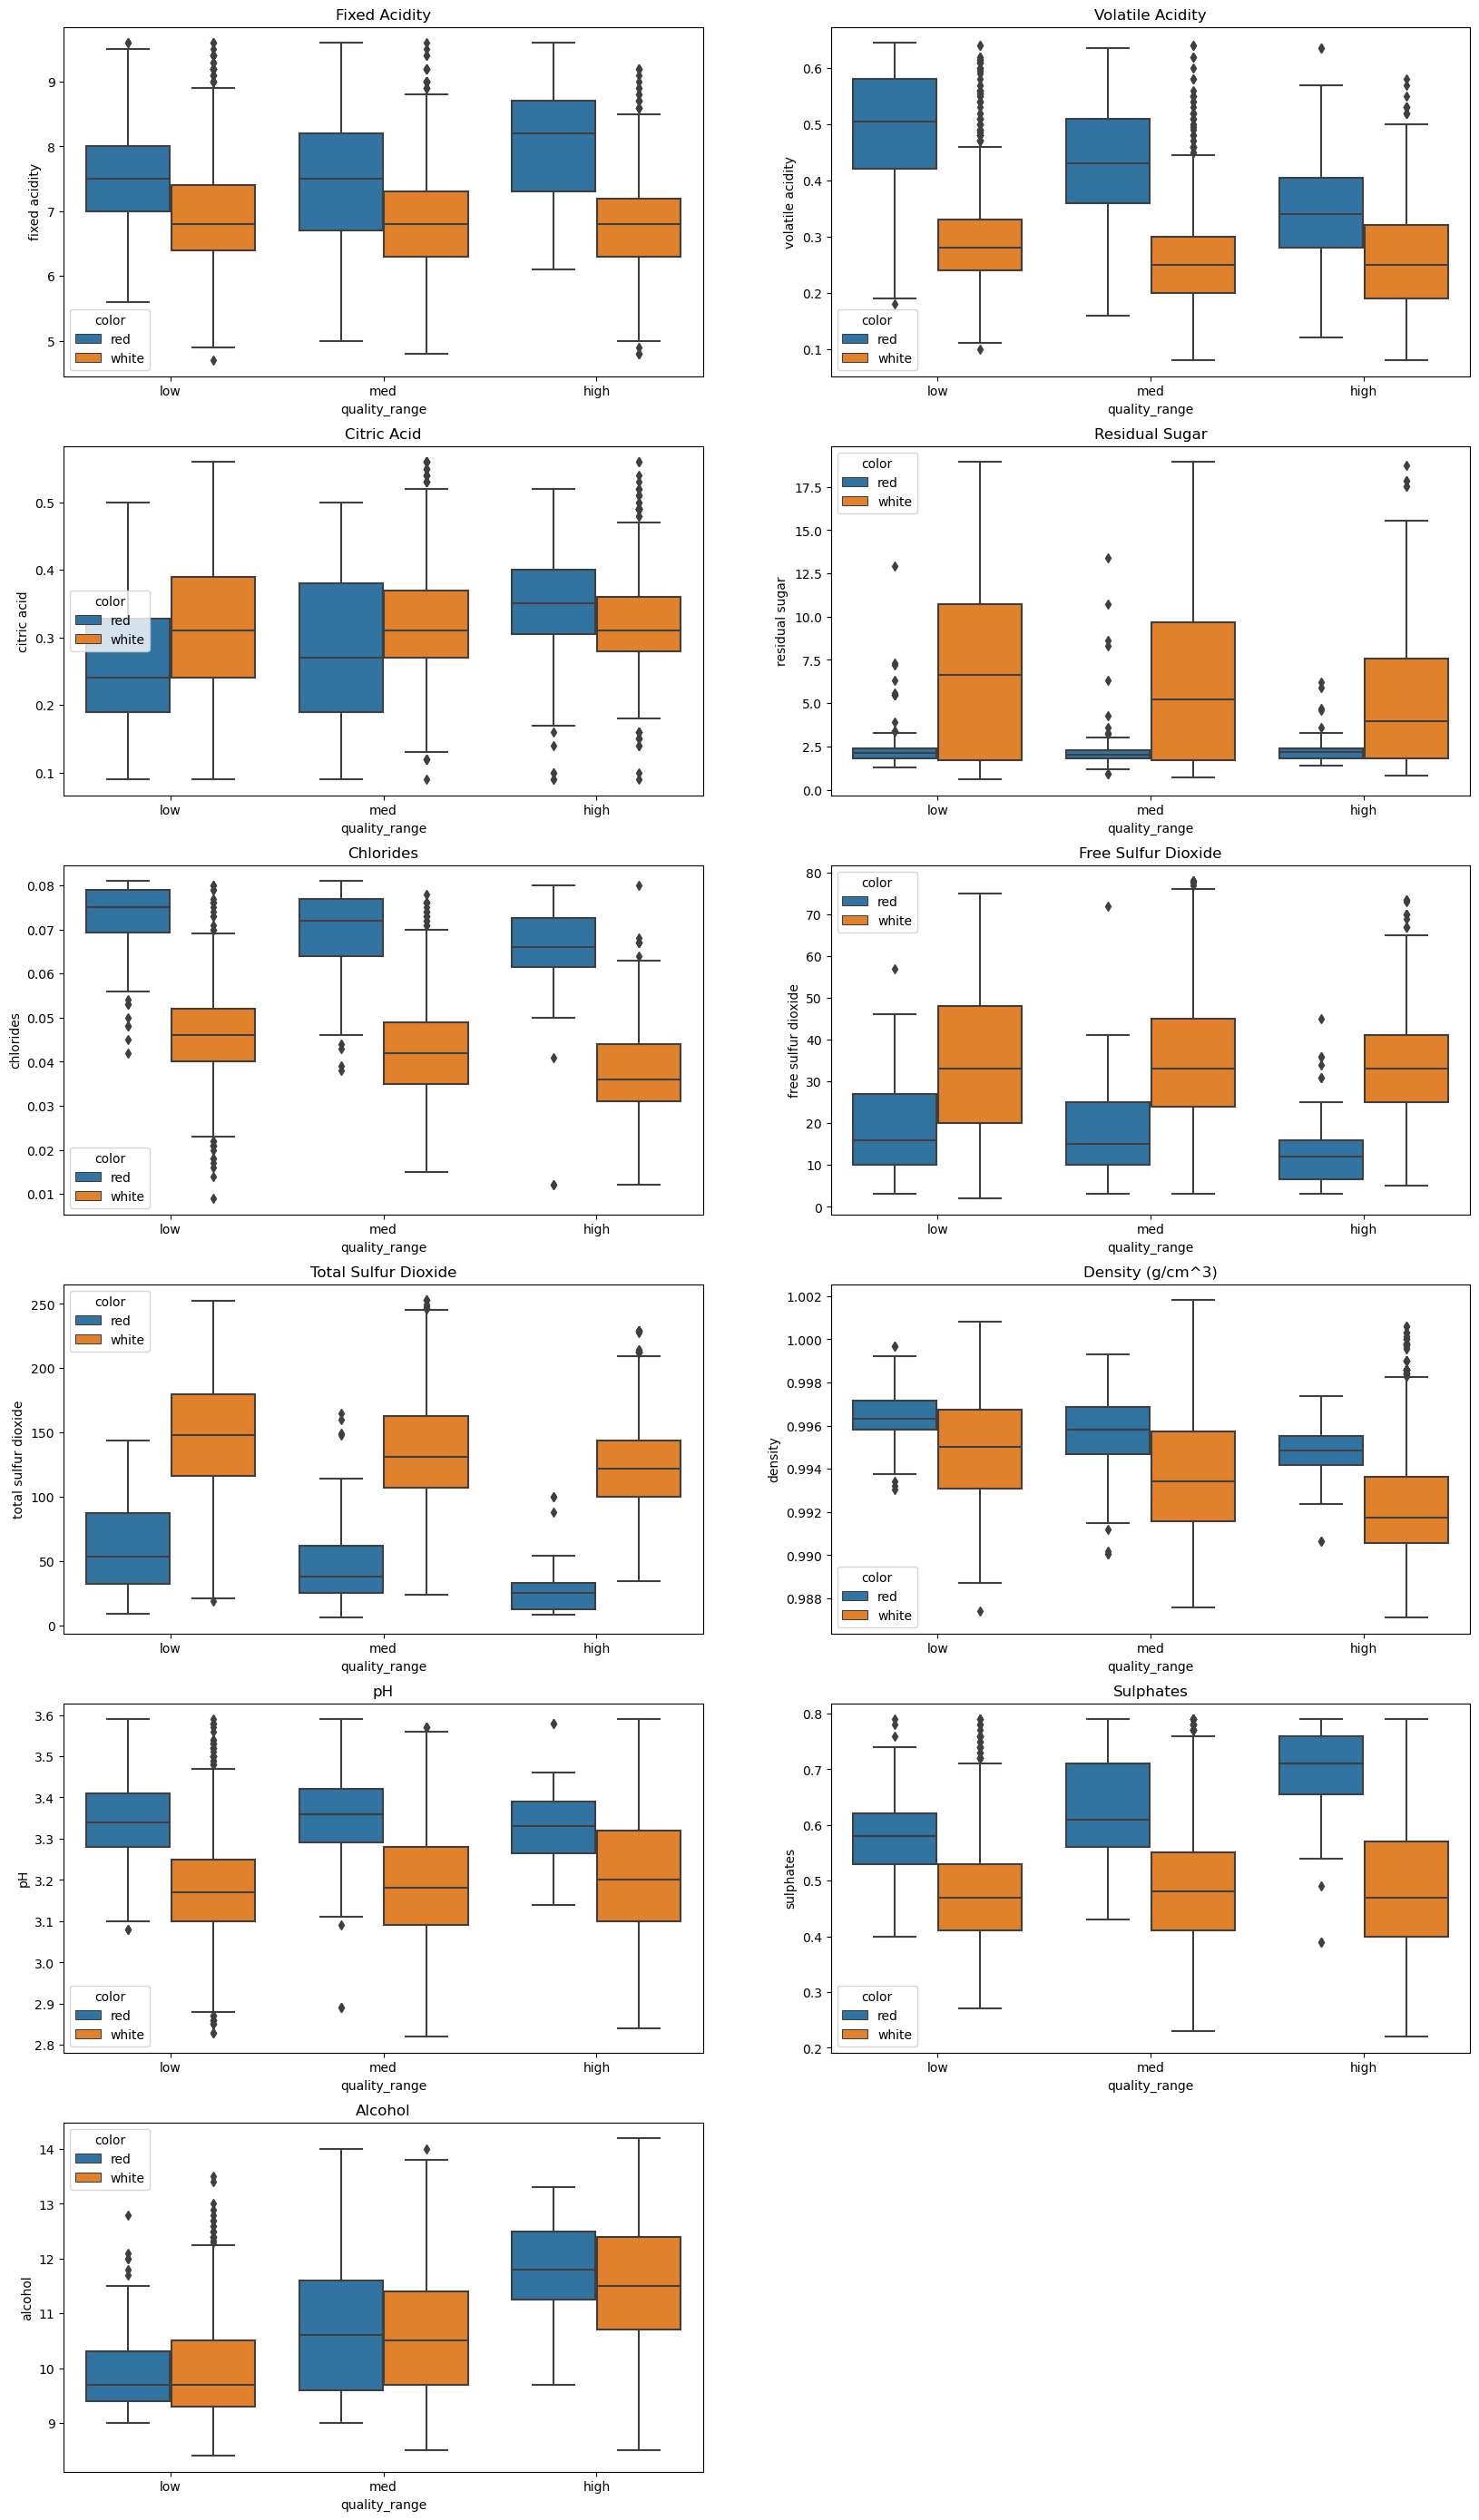

In [13]:
# df_quality_group = df_wine_merged.groupby('quality_range')['color']
# df_quality_group.head()

plt.subplots(figsize=(20, 35))

plt.subplot(6,2,1)
sns.boxplot(x="quality_range", y="fixed acidity", hue='color', data=df_wine_altered)
plt.title('Fixed Acidity')

plt.subplot(6,2,2)
sns.boxplot(x="quality_range", y="volatile acidity", hue='color', data=df_wine_altered)
plt.title('Volatile Acidity')

plt.subplot(6,2,3)
sns.boxplot(x="quality_range", y="citric acid", hue='color', data=df_wine_altered)
plt.title('Citric Acid')

plt.subplot(6,2,4)
sns.boxplot(x="quality_range", y="residual sugar", hue='color', data=df_wine_altered)
plt.title('Residual Sugar')

plt.subplot(6,2,5)
sns.boxplot(x="quality_range", y="chlorides", hue='color', data=df_wine_altered)
plt.title('Chlorides')

plt.subplot(6,2,6)
sns.boxplot(x="quality_range", y="free sulfur dioxide", hue='color', data=df_wine_altered)
plt.title('Free Sulfur Dioxide')

plt.subplot(6,2,7)
sns.boxplot(x="quality_range", y="total sulfur dioxide", hue='color', data=df_wine_altered)
plt.title('Total Sulfur Dioxide')

plt.subplot(6,2,8)
sns.boxplot(x="quality_range", y="density", hue='color', data=df_wine_altered)
plt.title('Density (g/cm^3)')

plt.subplot(6,2,9)
sns.boxplot(x="quality_range", y="pH", hue='color', data=df_wine_altered)
plt.title('pH')

plt.subplot(6,2,10)
sns.boxplot(x="quality_range", y="sulphates", hue='color', data=df_wine_altered)
plt.title('Sulphates')

plt.subplot(6,2,11)
sns.boxplot(x="quality_range", y="alcohol", hue='color', data=df_wine_altered)
plt.title('Alcohol')

plt.show()

A couple notes of interest here:
 -  As we look at what makes the highest quality wine, we can see visually the correlation mentioned earlier:
     -  There is divergence between reds and whites in Fixed Acidity, Chlorides, Free and Total Sulfur Dioxide, and Sulphates
         -  The higher level of sulphates in red wines but lower levels of sulfor dioxide is interesting, and almost opposite
         -  One might conclude that sulfur dioxide occurs naturally in greater amounts in white vinho-verde which means a greater amount needs to be added to reds for preservation purposes, hence high red values of suphates
     -  Convergence exists in pH
     -  Values for Citric Acid and Residual Sugar largely stay in the same range
     -  Clear correlation of alcohol content and quality for both reds and whites
     
Generally, it's difficult to draw conclusions as to where quality is significantly impacted by individual chemical component

#### Question: So, what makes a great Vinho-Verde if I'm a winemaker?

<Axes: >

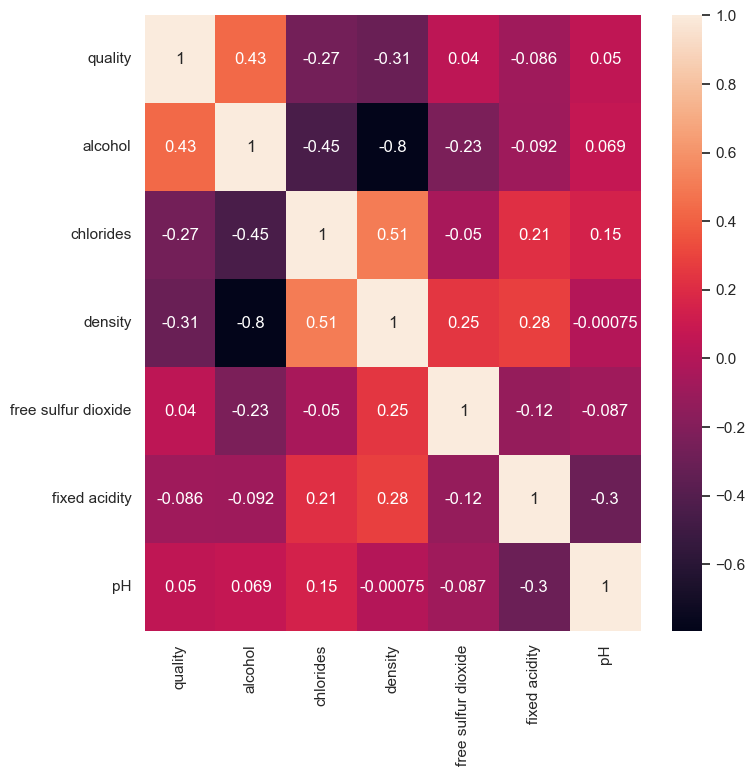

In [14]:
# Lets revisit correlation now that we removed some outliers
# Code from in-class lecture

# plot the correlation matrix using a subset of features
vars_to_use = ['quality','alcohol', 'chlorides', 'density', 'free sulfur dioxide', 'fixed acidity', 'pH'] # pick vars

cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_wine_altered[vars_to_use].corr(), cmap=cmap, annot=True)

With the paired down data some correlation we would expect to see is more clearly visible.

For example:
 -  Density is inversely correlated to alcohol which is to be expected
 -  Density is also impacted by chlorides, free sulfur dioxide
 -  Acidity and pH are negativelty correlated which is also to be expected 

General take aways if you want to make a high quality Vinho-Verde:
 -  Aim for the higher end of Alcohol content
 -  Keep chlorides lower
 -  Density should naturally be lower with higher alcohol
 
 Overall, its difficult to say this data makes a compelling argument that we can use chemistry to achieve a great vinho-verde
 
 Let's try one more plot to see what we can make of a scatterplot matrix:

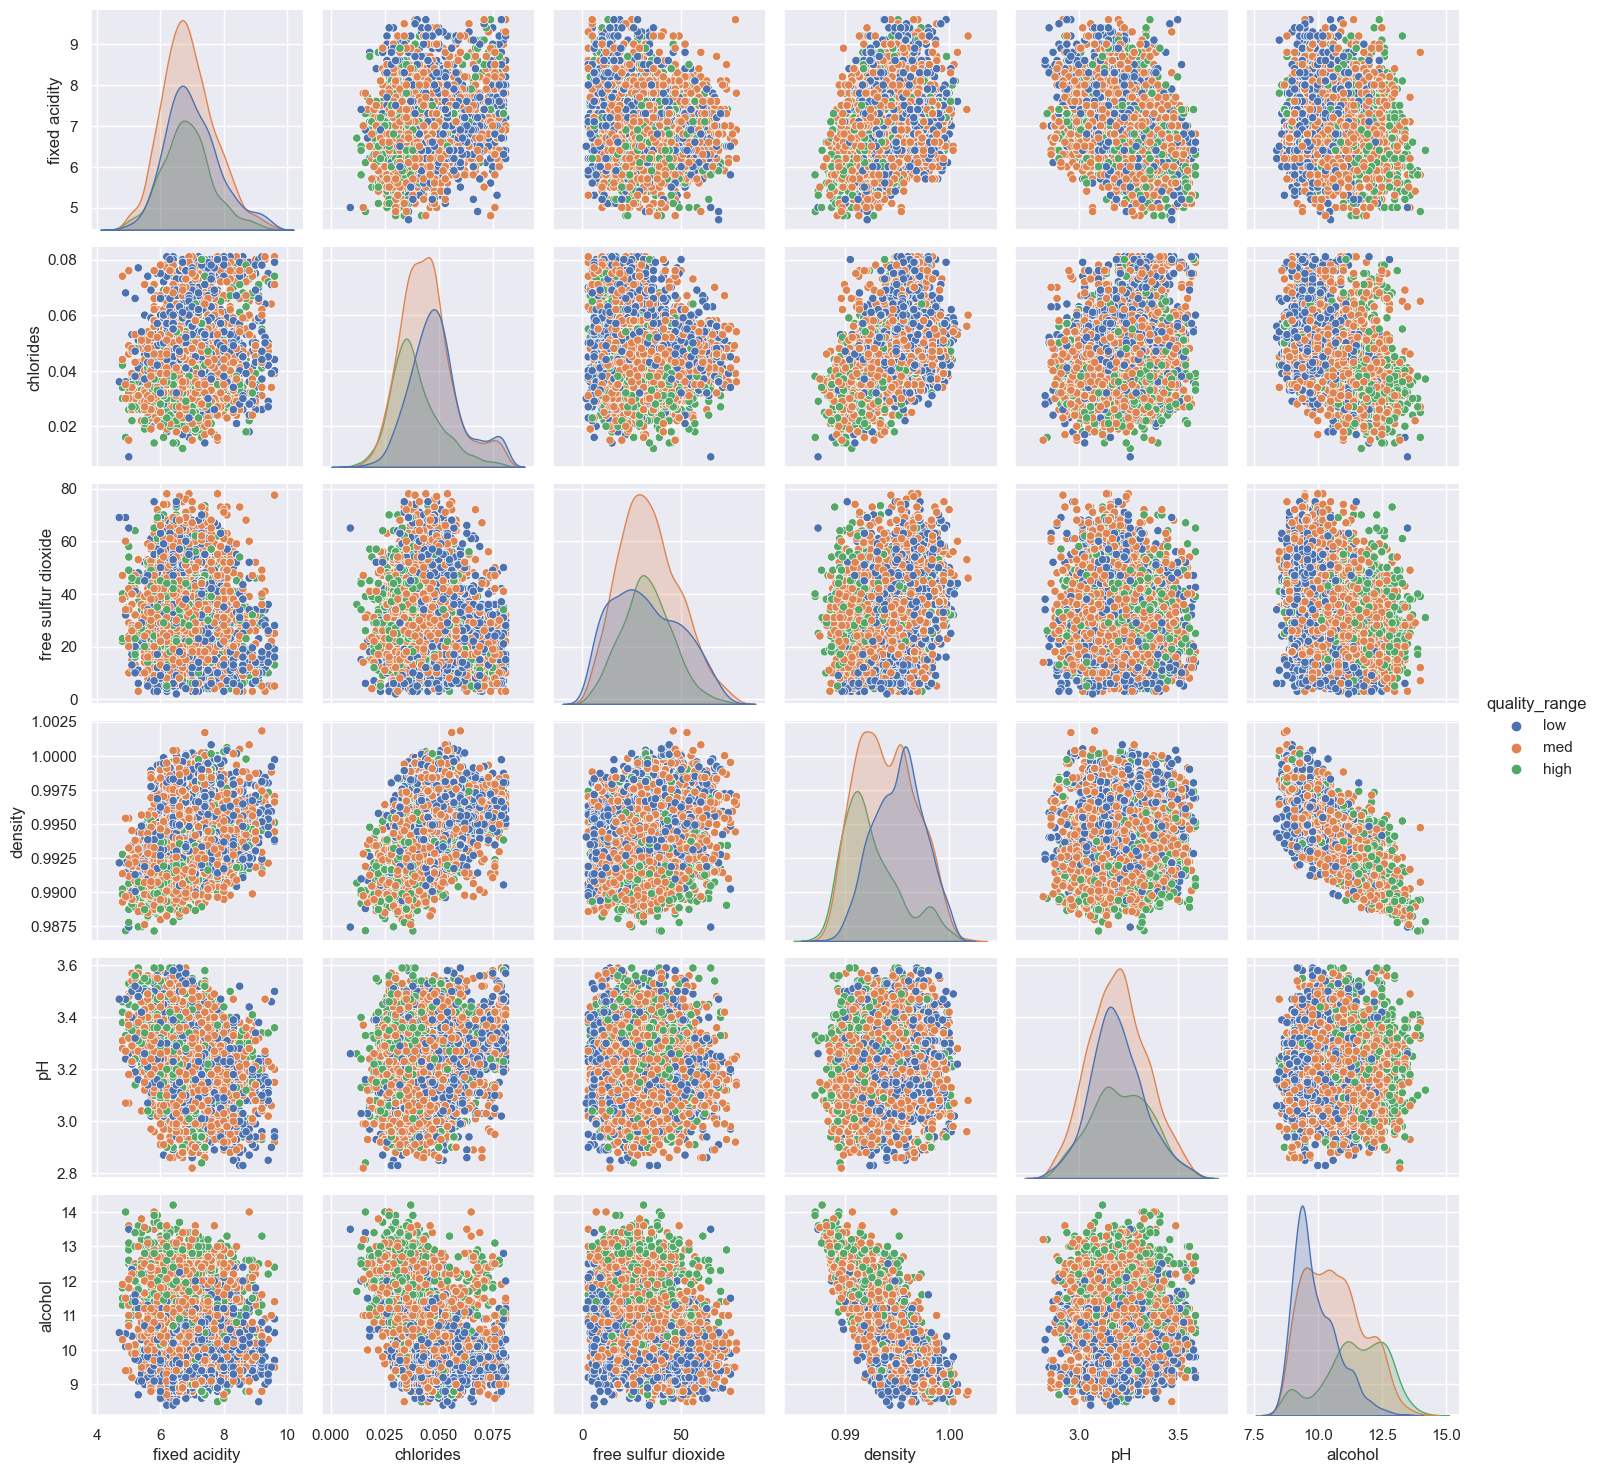

In [15]:
# We'll narrow our data selection to items that seemed more important for good quality
df_wine_narrowed = df_wine_altered[
    [
        'color',
        'quality_range', 
        'fixed acidity',
        'chlorides', 
        'free sulfur dioxide', 
        'density', 
        'pH', 
        'alcohol'
    ]
]
# sns.pairplot(df_wine_altered, hue='color', corner=True)
sns.pairplot(df_wine_narrowed, hue='quality_range')

Largely not seeing a lot to work with here. There are obviously correlations we've seen before like alcohol and density. And we see the expected ranges on high quality wines and their alcohol content. But nothing is leaping off the page that would lead us to make some chemical related decisions to improve our winemaking enterprise.

In [19]:
# One final thing I'll export the dataframe for future use
df_wine_altered.to_csv('wine_df.csv', index = False)

# 4. UMAP Exploration

In [17]:
# Source: https://umap-learn.readthedocs.io/en/latest/basic_usage.html

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap

reducer = umap.UMAP()

wine_data_to_scale = df_wine_narrowed[ # Picking a selection of features that appeared important
    [ 
        'fixed acidity',
        'chlorides', 
        'free sulfur dioxide', 
        'density', 
        'pH', 
        'alcohol'
    ]
].values

df_wine_scaled = StandardScaler().fit_transform(wine_data_to_scale)

embedding = reducer.fit_transform(df_wine_scaled)
embedding.shape

C:\Users\Chip\anaconda3\envs\mlenv7324\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Chip\anaconda3\envs\mlenv7324\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Chip\anaconda3\envs\mlenv7324\lib\site-packages\umap\distances.py:1086: Num

(4596, 2)

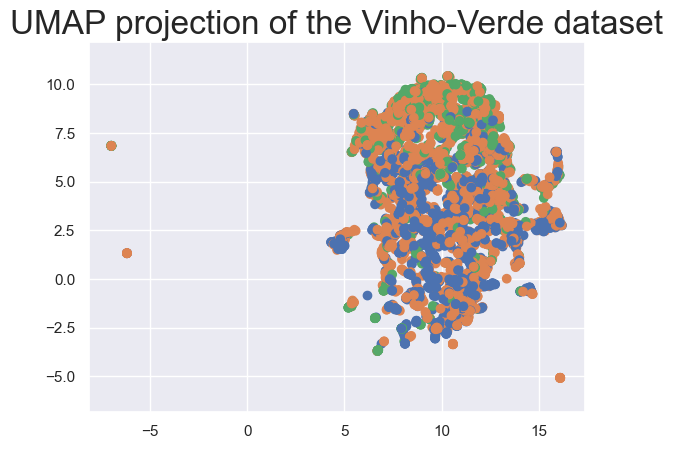

In [18]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_wine_narrowed.quality_range.map({"low":0, "med":1, "high":2})])
plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Vinho-Verde dataset', fontsize=24);

Here I would be looking for some obvious clustering of groups related to our quality bins. But in for the dataset at hand there does not appear to be a lot of useful takeaways.